# Diplomat python exam - Daniel Rodin

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I saved the data in a data.xlsx excel file.
df = pd.read_excel('data.xlsx')

In [115]:
df.head(5)

,ID_CUSTOMER,Biz,max_trans_buy,OrderCount,OrderCountLessThen100,ratio_100_bas,avg_NetSaleNoVAT_M,avg_bas_M,distinct_categ,IND_LOW_NUM_CTEGORY,IND_HIGH_FREQ
0,1,1,2016-07-13,1,0,0,229.91,1,3,1,0
1,2,1,2018-07-11,2,0,0,173.03,1,4,1,0
2,3,1,2015-04-13,3,0,0,464.46,1,10,0,0
3,4,1,2020-04-29,1185,0,0,197875.57,592,13,0,1
4,5,1,2020-03-08,62,0,0,1681.91,3,11,0,0


In [5]:
df.shape

(4000, 9)

In [7]:
df.describe()

,ID_CUSTOMER,Biz,OrderCount,OrderCountLessThen100,avg_NetSaleNoVAT_M,avg_bas_M,distinct_categ
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,0.500000,83.368000,2.459250,1522.122270,2.938250,10.673500
std,1154.844867,0.500063,268.621869,24.954509,4235.539133,10.948374,5.218736
min,1.000000,0.000000,0.000000,0.000000,-2218.000000,0.000000,1.000000
25%,1000.750000,0.000000,1.000000,0.000000,286.250000,1.000000,7.000000
50%,2000.500000,0.500000,11.000000,0.000000,869.135000,2.000000,11.000000
75%,3000.250000,1.000000,109.000000,1.000000,1989.730000,4.000000,14.000000
max,4000.000000,1.000000,11149.000000,912.000000,197875.570000,592.000000,29.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_CUSTOMER            4000 non-null   int64         
 1   Biz                    4000 non-null   int64         
 2   max_trans_buy          4000 non-null   datetime64[ns]
 3   OrderCount             4000 non-null   int64         
 4   OrderCountLessThen100  4000 non-null   int64         
 5   ratio_100_bas          4000 non-null   object        
 6   avg_NetSaleNoVAT_M     4000 non-null   float64       
 7   avg_bas_M              4000 non-null   int64         
 8   distinct_categ         4000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 281.4+ KB


In [12]:
df.nunique()

ID_CUSTOMER              4000
Biz                         2
max_trans_buy            1037
OrderCount                410
OrderCountLessThen100      55
ratio_100_bas             418
avg_NetSaleNoVAT_M       3888
avg_bas_M                  36
distinct_categ             29
dtype: int64

In [16]:
# There are no NaN values
# If there were, there are a few ways of dealing with them:
# 1) If the data is large enough and the number of NULLs is small, I'd consider discarding them.
# 2) Replace them with 0
# 3) Replace them with the most common occurrence ('mode()' method) or with the average/median of the feature.
print(df.isnull().sum())

ID_CUSTOMER              0
Biz                      0
max_trans_buy            0
OrderCount               0
OrderCountLessThen100    0
ratio_100_bas            0
avg_NetSaleNoVAT_M       0
avg_bas_M                0
distinct_categ           0
dtype: int64


In [17]:
# Zero values in the dataframe
(df == 0).astype(int).sum(axis=0)

ID_CUSTOMER                 0
Biz                      2000
max_trans_buy               0
OrderCount                 18
OrderCountLessThen100    2075
ratio_100_bas            2057
avg_NetSaleNoVAT_M         11
avg_bas_M                  53
distinct_categ              0
dtype: int64

In [20]:
# Negative values in the monthly average sales, which probably indicates returned products. 
df.avg_NetSaleNoVAT_M.sort_values()

3125     -2218.00
3968     -1959.97
765      -1363.25
2512      -934.53
3822      -726.80
          ...    
528      42115.11
697      49826.79
597      56545.82
1130     94924.30
3       197875.57
Name: avg_NetSaleNoVAT_M, Length: 4000, dtype: float64

In [22]:
# Even distribution between business and regular customers
df.Biz.value_counts()

1    2000
0    2000
Name: Biz, dtype: int64

In [21]:
# Even distribution between negative monthly average values for business and regular customers
df[df.avg_NetSaleNoVAT_M<0]['Biz'].value_counts(dropna=False)

0    23
1    21
Name: Biz, dtype: int64

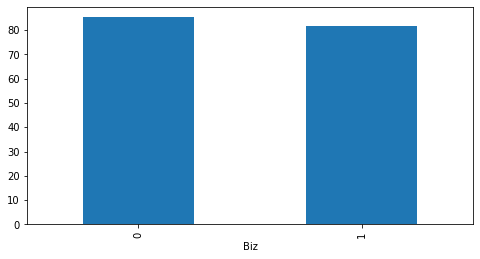

In [72]:
df.groupby('Biz')['OrderCount'].mean().plot.bar(figsize=(8,4))

In [76]:
df.OrderCount.mean()

83.368

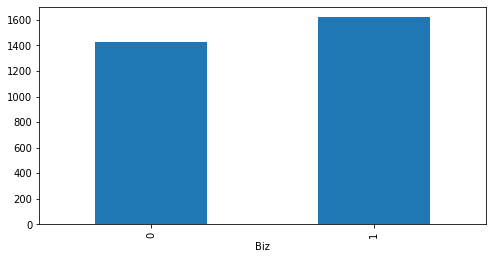

In [71]:
# Business customers have slightly higher monthly average purchases
df.groupby('Biz')['avg_NetSaleNoVAT_M'].mean().plot.bar(figsize=(8,4))

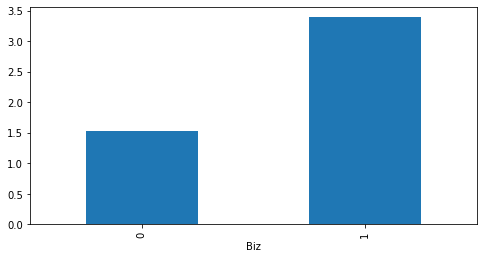

In [70]:
# Business customers have significantly higher purchase ratio for small orders.
df.groupby('Biz')['OrderCountLessThen100'].mean().plot.bar(figsize=(8,4))

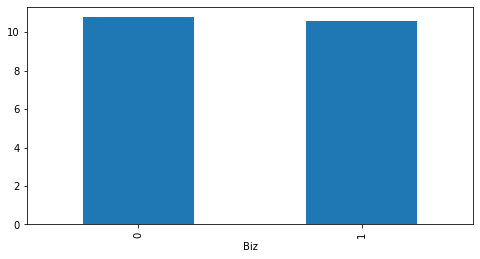

In [83]:
df.groupby('Biz')['distinct_categ'].mean().plot.bar(figsize=(8,4))

In [84]:
df.distinct_categ.mean()

10.6735

In [103]:
df.distinct_categ.median()

11.0

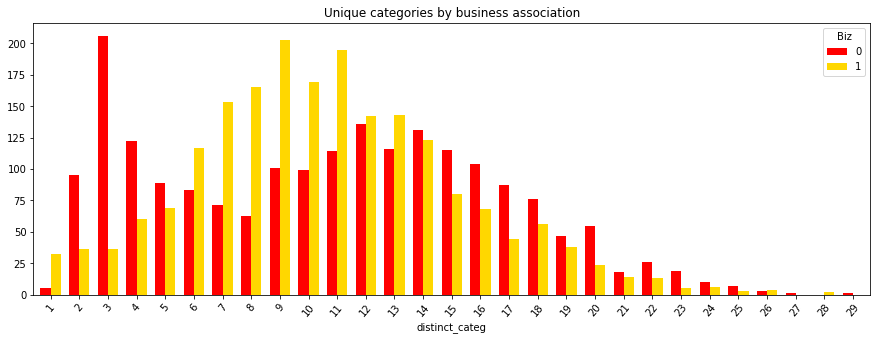

In [69]:
# There seems to be a correlation between certain categories and business customers
df.groupby(['distinct_categ', 'Biz']).size().unstack().plot(width = 0.7, kind='bar',figsize=(15, 5), color=['red', 'gold'], title='Unique categories by business association', rot=50);

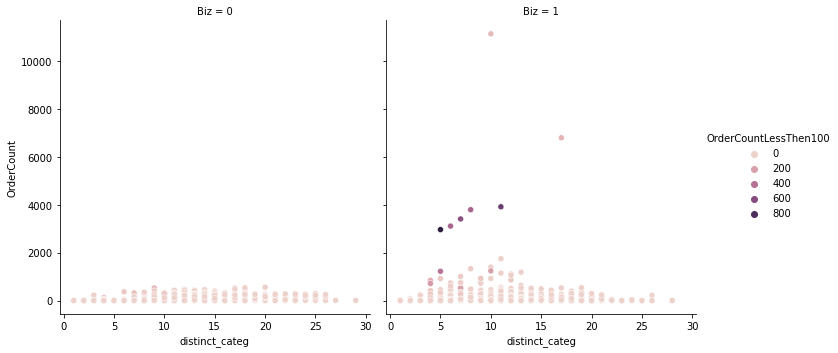

In [67]:
# Biz customers prefer <100 NIS baskets
sns.relplot(x="distinct_categ", y="OrderCount", hue='OrderCountLessThen100',
            col="Biz", data=df, height=5);

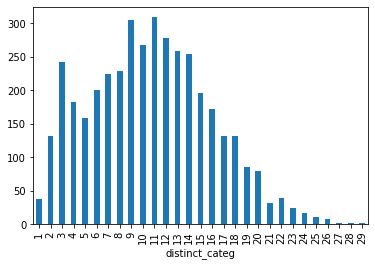

In [53]:
# Distinct categories distribution
df.groupby('distinct_categ')['ID_CUSTOMER'].count().plot.bar()

In [58]:
df[df['Biz'] == 1].distinct_categ.mean()

10.5785

In [59]:
df[df['Biz'] == 0].distinct_categ.mean()

10.7685

In [60]:
# The average number of categories for business and none business customer is almost identical.

# IND_LOW_NUM_CTEGORY

**1 = buy less categories (under 30th percentile)**
---
**0 = rest of the customers**

In [104]:
df.distinct_categ.quantile(0.3)

8.0

In [106]:
df['IND_LOW_NUM_CTEGORY'] = df['distinct_categ'].apply(lambda x: 1 if x < 8 else 0)

In [107]:
df.IND_LOW_NUM_CTEGORY.value_counts()

0    2826
1    1174
Name: IND_LOW_NUM_CTEGORY, dtype: int64

# IND_HIGH_FREQ

**1 = high monthly acquisition rate (70th percentile and above)**
---
**0 = rest of the customers**

In [114]:
df.avg_bas_M.quantile(0.7)

4.0

In [119]:
df.drop('IND_HIGH_FREQ', axis=1, inplace=True)

In [120]:
df['IND_HIGH_FREQ'] = df['avg_bas_M'].apply(lambda x: 1 if x > 4 else 0)

In [121]:
df.IND_HIGH_FREQ.value_counts()

0    3627
1     373
Name: IND_HIGH_FREQ, dtype: int64

# IND_HIGH_RATIO_SMALL_BAS

**1 = high quantity of small baskets (70th percentile and above)**
---
**0 = rest of the customers**

In [130]:
# The question marks in the ratio_100_bas column will be transformed into 0 (they all come from customers with negative avg_NetSaleNoVAT_M)
df[~df.applymap(np.isreal).all(1)]

,ID_CUSTOMER,Biz,max_trans_buy,OrderCount,OrderCountLessThen100,ratio_100_bas,avg_NetSaleNoVAT_M,avg_bas_M,distinct_categ,IND_LOW_NUM_CTEGORY,IND_HIGH_FREQ
83,84,1,2016-11-22,0,0,?,-0.66,0,1,1,0
223,224,1,2016-10-06,0,0,?,-170.94,0,1,1,0
231,232,1,2016-11-22,0,0,?,-6.84,0,1,1,0
249,250,1,2016-11-22,0,0,?,-0.44,0,1,1,0
361,362,1,2016-11-22,0,0,?,-1.71,0,1,1,0
404,405,1,2015-01-13,0,0,?,-4.24,0,1,1,0
701,702,1,2016-11-22,0,0,?,-5.73,0,1,1,0
765,766,1,2018-07-26,0,0,?,-1363.25,0,1,1,0
784,785,1,2016-11-22,0,0,?,-4.50,0,1,1,0
804,805,1,2016-11-22,0,0,?,-29.04,0,1,1,0


In [131]:
df.ratio_100_bas.replace(to_replace='?', value=0, inplace=True)

In [132]:
# No '?' left in the data:
df[~df.applymap(np.isreal).all(1)]

,ID_CUSTOMER,Biz,max_trans_buy,OrderCount,OrderCountLessThen100,ratio_100_bas,avg_NetSaleNoVAT_M,avg_bas_M,distinct_categ,IND_LOW_NUM_CTEGORY,IND_HIGH_FREQ


In [134]:
df.ratio_100_bas.mean()

0.20874457500000002

In [135]:
df.ratio_100_bas.quantile(0.7)

0.026999999999999996

In [136]:
df['IND_HIGH_RATIO_SMALL_BAS'] = df['ratio_100_bas'].apply(lambda x: 1 if x > 0.27 else 0)

In [137]:
df.IND_HIGH_RATIO_SMALL_BAS.value_counts()

0    3183
1     817
Name: IND_HIGH_RATIO_SMALL_BAS, dtype: int64

# BIG_BASKET_IND

**1 = high monthly basket value (80th percentile and above)**
---
**0 = rest of the customers**

In [138]:
df.avg_NetSaleNoVAT_M.mean()

1522.122270000003

In [139]:
df.avg_NetSaleNoVAT_M.quantile(0.8)

2258.166000000001

In [140]:
df['BIG_BASKET_IND'] = df['avg_NetSaleNoVAT_M'].apply(lambda x: 1 if x > df.avg_NetSaleNoVAT_M.quantile(0.8) else 0)

In [141]:
df.BIG_BASKET_IND.value_counts()

0    3200
1     800
Name: BIG_BASKET_IND, dtype: int64

# SUM BUSINESS 
Sums up the 3 indicators (big basket, high ratio of small baskets and ind high frequency). The higher the number, the bigger the chance that the customer is business customer. Ranges from 0 to 3.

In [144]:
df['SUM_BUSINESS']=(df.loc[:,['BIG_BASKET_IND','IND_HIGH_RATIO_SMALL_BAS', 'IND_HIGH_FREQ']].sum(axis=1))

# IS BUSINESS
If SUM BUSINESS is higher than 1, AND indicator for low number of categories is 0, the customer is potentially a business customer.

In [160]:
def flag_df(x):
    
    if (x['SUM_BUSINESS'] > 1 ) and (x['IND_LOW_NUM_CTEGORY'] == 0):
        return 1
    else:
        return 0
    
df['IS_BUSINESS'] = df.apply(flag_df, axis = 1)

In [161]:
df.IS_BUSINESS.value_counts()

0    3796
1     204
Name: IS_BUSINESS, dtype: int64

In [162]:
# 100 customers that defined as Biz=0 but have the potential to be business customers:
df[(df['IS_BUSINESS'] == 1) & (df['Biz'] == 0)]

,ID_CUSTOMER,Biz,max_trans_buy,OrderCount,OrderCountLessThen100,ratio_100_bas,avg_NetSaleNoVAT_M,avg_bas_M,distinct_categ,IND_LOW_NUM_CTEGORY,IND_HIGH_FREQ,IND_HIGH_RATIO_SMALL_BAS,BIG_BASKET_IND,SUM_BUSINESS,IS_BUSINESS
2007,2008,0,2020-03-18,28,0,0.0000,5336.39,5,19,0,1,0,1,2,1
2062,2063,0,2020-04-30,10,1,0.1000,3795.60,5,13,0,1,0,1,2,1
2070,2071,0,2020-04-05,323,1,0.0031,2736.30,5,17,0,1,0,1,2,1
2092,2093,0,2020-04-23,340,0,0.0000,2955.51,5,14,0,1,0,1,2,1
2120,2121,0,2020-04-28,5,0,0.0000,3333.64,5,20,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,0,2020-04-30,439,4,0.0091,2827.24,6,12,0,1,0,1,2,1
3901,3902,0,2020-04-27,301,11,0.0365,2262.22,7,10,0,1,0,1,2,1
3943,3944,0,2020-04-28,10,1,0.1000,2580.80,5,13,0,1,0,1,2,1
3986,3987,0,2020-04-28,477,0,0.0000,5348.42,7,17,0,1,0,1,2,1


# Conclusion:
I have found a number of customers that are potentially have wrong classification as none business customers. The threshold can be reduced (SUM BUSINESS > 0) and the number of potential business customers will increase with it.